In [1]:
import wget
import os
import shutil
import zipfile
from tqdm import tqdm
import copy

# Download Data

In [2]:
import torch

In [5]:
if os.path.isfile('../RockPapersScissor/rockpaperscissors.zip') :    
    print('file sudah ada')
else:
    wget.download(
        'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip' , 
        '../RockPapersScissor'
    )

file sudah ada


# Ekstrak data

In [6]:
if os.path.exists('../RockPapersScissor/rockpaperscissors'):
    print('File Sudah Terekstrak Sebelumnya')
else:
    pass
    #Ekstrak data 
    lokasi_file_zip = '../RockPapersScissor/rockpaperscissors.zip'
    zip_file = zipfile.ZipFile(lokasi_file_zip,mode='r')
    zip_file.extractall('../RockPapersScissor')
    zip_file.close()
    print('Ekstrak berhasil')

Ekstrak berhasil


In [7]:
#Menyiapkan Lokasi
lokasi_kertas = '..\\RockPapersScissor\\rockpaperscissors\\paper'
lokasi_batu = '..\\RockPapersScissor\\rockpaperscissors\\rock'
lokasi_gunting = '..\\RockPapersScissor\\rockpaperscissors\\scissors'

In [8]:
#Dengan Porsi 80% untuk train dan 20% untuk validation

#Membuah Masing masing data menjadi list dan dimasukan ke variabel
kertas = os.listdir(lokasi_kertas)
gunting = os.listdir(lokasi_gunting)
batu = os.listdir(lokasi_batu)

In [9]:
import random
random.seed(0)

In [10]:
a = random.randint(a=0, b=3)
a

3

In [11]:
def pisah_data(data, train_size=0.8):

    """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
    dengan urutan hasil return : data_train, data_validasi"""
    test_size = 1 - train_size
    data_backup = copy.deepcopy(data)
    n_train = int(train_size * len(data_backup))
    n_test  = int(test_size  * len(data_backup))
    
    selisih =len(data_backup) - (n_train + n_test)
    print(len(data_backup), " - ( ",n_train, " + ", n_test," ) = ",selisih)
    if selisih > 0:
        n_test +=selisih

    train = []
    #memilih data train dari data
    while len(train) != n_train:
        bantu = random.randint(0, (len(data_backup)-1))
        if data_backup[bantu] not in train:
            train.append(data_backup[bantu])
            del data_backup[bantu]

    #Sisanya Dicopy kedalam Train
    test = copy.deepcopy(data_backup)
    del data_backup
    
    print("Panjang train : ",n_train)
    print("Panjang test : ",n_test,"\n")
    return train, test

In [12]:
train_kertas, test_kertas = pisah_data(kertas)
train_gunting, test_gunting = pisah_data(gunting)
train_batu, test_batu = pisah_data(batu)

712  - (  569  +  142  ) =  1
Panjang train :  569
Panjang test :  143 

750  - (  600  +  149  ) =  1
Panjang train :  600
Panjang test :  150 

726  - (  580  +  145  ) =  1
Panjang train :  580
Panjang test :  146 



In [13]:
#Selanjutnya pindahkan ke folder terpisah

#Membuat fungsi untuk membuat folder penyimpanan dan memindahkan data yang telah dipisahkan kedalam folder tersebut
def cd_data(data_train, data_test, data_path, train_path, test_path):
    """Fungsi ini untuk membuat folder penyimpanan dan 
    memasukan data yang telah dipisahkan dengan folder tersebut"""
      
    #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
    if not (os.path.exists(train_path) and os.path.exists(test_path)):
        os.makedirs(train_path)
        os.makedirs(test_path)
      
    #memindahkan ke folder terpisah
    for i in range(len(data_train)):
        shutil.move(os.path.join(data_path, data_train[i]), os.path.join(train_path, data_train[i]))
      
    #memindahkan ke folder terpisah
    for i in range(len(data_test)):
        shutil.move(os.path.join(data_path, data_test[i]), os.path.join(test_path, data_test[i]))

In [14]:
#Buat lokasi train dan validation
lokasi_train_set = '..\\RockPapersScissor\\data\\train'
lokasi_test_set = '..\\RockPapersScissor\\data\\test'

In [15]:
label_dict = {
    'paper': (train_kertas, test_kertas, lokasi_kertas),
    'rock': (train_batu, test_batu, lokasi_batu),
    'scissors': (train_gunting, test_gunting, lokasi_gunting)
}

In [16]:
if os.path.exists(lokasi_train_set and lokasi_test_set):
    print('Folder Sudah ada')
else:
    for label, value in label_dict.items():
        cd_data(
            value[0],
            value[1],
            value[2],
            os.path.join(lokasi_train_set,label),
            os.path.join(lokasi_test_set,label)
        ) 

Folder Sudah ada


In [17]:
if os.path.exists('rockpaperscissors/'):
    shutil.rmtree('rockpaperscissors/')
else:
    print("file sudah dihapus")

In [18]:
import torch

In [19]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Dataset & dataloader

In [20]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [21]:
bs = 128
crop_size = 128

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(140),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [22]:
feature, target = next(iter(trainloader))
feature.shape

torch.Size([128, 3, 128, 128])

In [23]:
label = train_set.classes
label

['paper', 'rock', 'scissors']

# Arsitektur & Config 

In [24]:
from jcopdl.layers import conv_block, linear_block

In [25]:
128*4*4

2048

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            conv_block(3, 8),
            conv_block(8, 16), 
            conv_block(16, 32),
            conv_block(32, 64),
            conv_block(64, 128), 
            nn.Flatten()
        )
        
        self.fc = nn.Sequential(
            linear_block(2048, 1024, dropout=0.2),
            linear_block(1024, 512, dropout=0.2),
            linear_block(512, 256, dropout=0.2),
            linear_block(256, 3, activation="lsoftmax")
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [27]:
config = set_config({
    "batch_size": bs,
    "crop_size": crop_size
})

# Training Preparation -> MCOC

In [28]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model")

# Training

In [29]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc



Epoch     1
Train_cost  = 1.0994 | Test_cost  = 1.0985 | Train_score = 0.3413 | Test_score = 0.3417 |




Epoch     2
Train_cost  = 1.0975 | Test_cost  = 1.0918 | Train_score = 0.3871 | Test_score = 0.3440 |




Epoch     3
Train_cost  = 0.9636 | Test_cost  = 0.9965 | Train_score = 0.5512 | Test_score = 0.4670 |




Epoch     4
Train_cost  = 0.6473 | Test_cost  = 0.8753 | Train_score = 0.7381 | Test_score = 0.6264 |




Epoch     5
Train_cost  = 0.4249 | Test_cost  = 0.3486 | Train_score = 0.8491 | Test_score = 0.8861 |




Epoch     6
Train_cost  = 0.2842 | Test_cost  = 0.2325 | Train_score = 0.9051 | Test_score = 0.9157 |




Epoch     7
Train_cost  = 0.1907 | Test_cost  = 0.3745 | Train_score = 0.9388 | Test_score = 0.8405 |
==> EarlyStop patience =  1 | Best test_score: 0.9157




Epoch     8
Train_cost  = 0.1675 | Test_cost  = 0.2636 | Train_score = 0.9503 | Test_score = 0.9021 |
==> EarlyStop patience =  2 | Best test_score: 0.9157




Epoch     9
Train_cost  = 0.1358 | Test_cost  = 0.1216 | Train_score = 0.9571 | Test_score = 0.9658 |




Epoch    10
Train_cost  = 0.1338 | Test_cost  = 0.1560 | Train_score = 0.9651 | Test_score = 0.9522 |
==> EarlyStop patience =  1 | Best test_score: 0.9658




Epoch    11
Train_cost  = 0.1177 | Test_cost  = 0.1803 | Train_score = 0.9663 | Test_score = 0.9408 |
==> EarlyStop patience =  2 | Best test_score: 0.9658




Epoch    12
Train_cost  = 0.0916 | Test_cost  = 0.1207 | Train_score = 0.9714 | Test_score = 0.9613 |
==> EarlyStop patience =  3 | Best test_score: 0.9658




Epoch    13
Train_cost  = 0.0934 | Test_cost  = 0.1625 | Train_score = 0.9737 | Test_score = 0.9567 |
==> EarlyStop patience =  4 | Best test_score: 0.9658




Epoch    14
Train_cost  = 0.0704 | Test_cost  = 0.1326 | Train_score = 0.9788 | Test_score = 0.9658 |
==> EarlyStop patience =  5 | Best test_score: 0.9658
==> Execute Early Stopping at epoch: 14 | Best test_score: 0.9658
==> Best model is saved at model


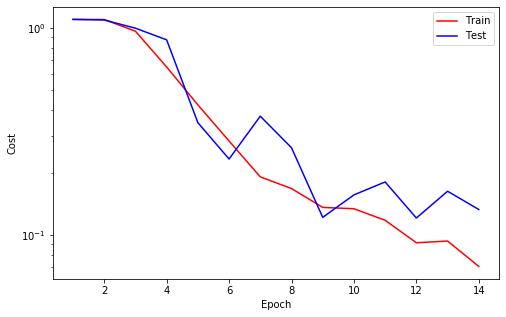

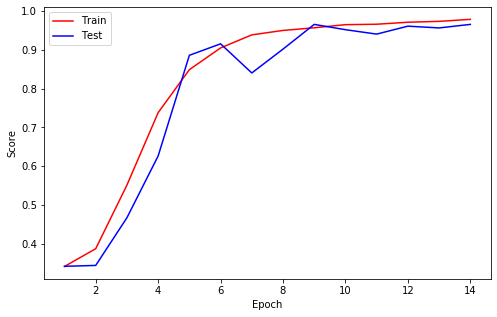

In [30]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

# Prediction

In [31]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [32]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2,
        2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2,
        2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0,
        1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
        2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
        0, 0, 1, 2, 1, 2, 2, 2], device='cuda:0')

In [33]:
import matplotlib.pyplot as plt

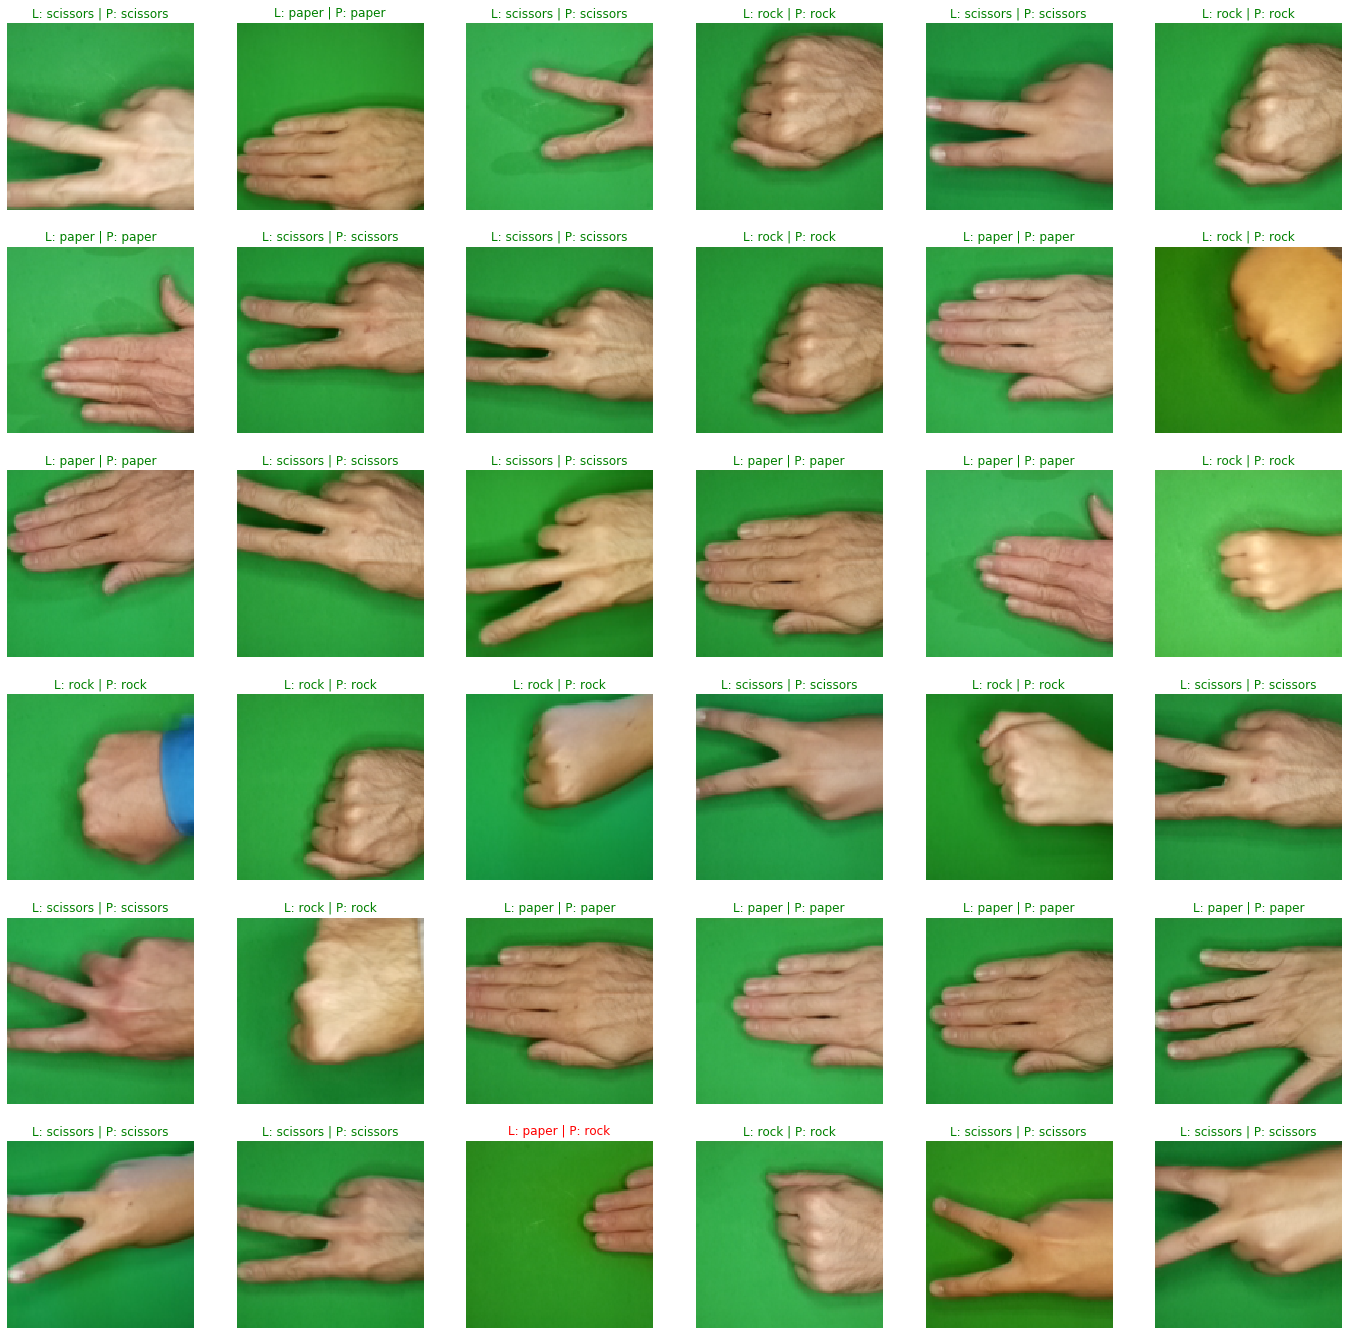

In [34]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}        
    label, pred = train_set.classes[label.item()], train_set.classes[pred.item()]
    ax.set_title(f"L: {label} | P: {pred}", fontdict=font);
    ax.axis('off');